# Hemläxa_01 below

# Labyrinth code, All in one customizable class

------------------------------------
R	-	-	-	-	-	-	-	-	-	

-	-	-	X	-	-	-	-	-	X	

-	-	-	-	-	-	X	-	-	-	

-	X	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	X	X	-	X	

-	-	-	-	-	-	-	-	-	-	

-	-	X	-	-	-	-	X	-	-	

-	-	-	-	-	-	-	-	-	-	

-	-	-	-	-	-	-	-	-	-	

-	X	-	-	-	-	-	-	-	-	

-------------------------------------
------------------------------------
R	-	-	-	-	-	X	X	-	X	

-	-	-	-	-	-	-	-	-	-	

X	-	-	-	-	X	X	-	-	-	

X	-	-	-	-	-	-	-	-	-	

-	-	-	X	-	-	-	-	-	-	

-	-	-	-	X	-	-	-	-	-	

-	-	-	-	-	X	X	X	-	X	

-	-	-	-	X	-	-	-	-	X	

X	X	X	-	-	-	-	-	-	X	

-	-	-	-	-	X	-	-	-	-	

-------------------------------------
------------------------------------
R	-	-	-	-	-	-	X	-	-	X	-	X	X	X	X	X	X	-	X	

X	-	-	X	-	X	-	-	-	X	X	-	-	X	-	X	-	-	X	X	

X	-	X	-	-	X	X	X	-	-	X	-	-	X	-	-	X	-	X	X	

X	X	-	X	-	X	X	-	-	X	-	X	-	X	X	-	-	-	X	X	

-	X	-	X	X	-	-	-	X	X	X	-	X	X	X	-	X	-	-	-	

-	X	X	X	-	X	-	X	-	X	X	X	-	-	X	-	X	X	X	X	

X	-	X	-	-	-	-	-	-	-	-	-	X	-	X	-	-	X	X	-	

X	X	X	-	-	X	-	-	-	-	X	-	-	X	X	X	X	X	X	X	

-	-	X	-	-	X	X	-	X	-	-	-	X	-	-	X	-	X	X

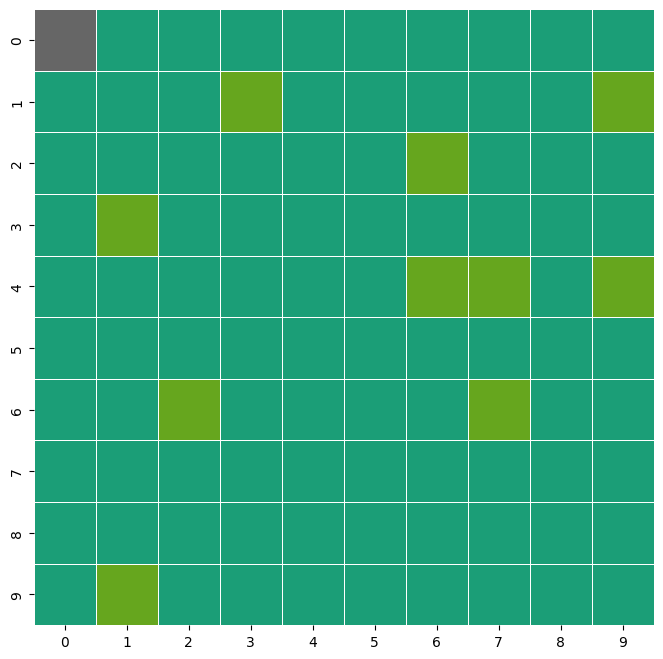

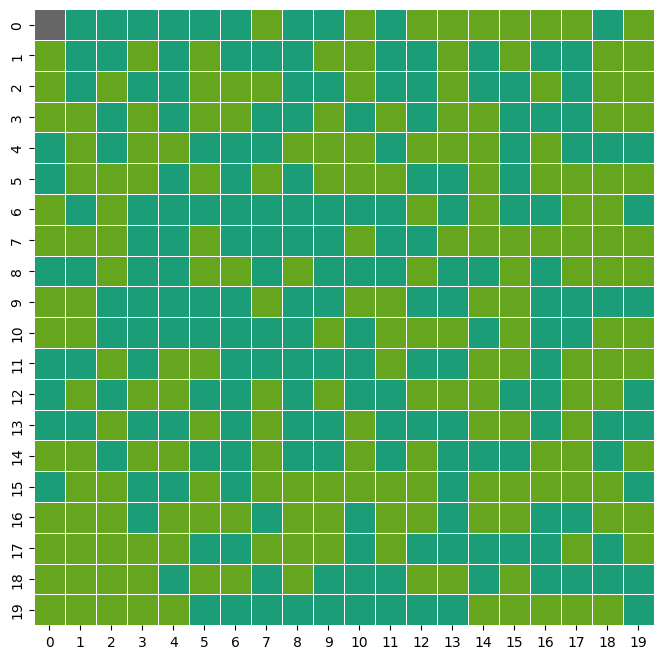

In [ ]:
import random
import numpy as np
from collections import deque
actionSpace = {'U': (-1,0), 'D': (1,0), 'L': (0,-1), 'R': (0,1)}  # action space

class Maze_v2(object): # One customizable class
    percentage = 0
    size = 0

    def __init__(self, size, percentage):

        self.size = size
        self.percent = percentage
        self.num_walls = size**2 *percentage
        self.maze = np.zeros((size, size))
        self.maze[0,0] = 2
        self.robotPosition = (0, 0)
        self.steps = 0
        self.constructAllowedStates()

        # Generate the maze
        self.createValidMaze(size, percentage)




    # Randomly generated instead of manual

    def generateMaze(self, size, percentage):
      maze = np.zeros((size, size))
      wall_count = int(percentage * size * size)

      while np.sum(maze) < wall_count:
          row, col = np.random.randint(0, size), np.random.randint(0, size)
          if (row, col) != (0, 0) and (row, col) != (size - 1, size - 1):  # Start position and end position not walls check
              maze[row, col] = 1
      maze[0,0] = 0
      return maze

    def isValidMaze(self ,maze):
        dim = len(maze)
        visited = np.zeros((dim, dim), dtype=bool)
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        queue = deque([(0, 0)])

        while queue:
            row, col = queue.popleft()

            if (row, col) == (dim - 1, dim - 1):
                return True

            for move in moves:
                new_row, new_col = row + move[0], col + move[1]

                if 0 <= new_row < dim and 0 <= new_col < dim and \
                  not visited[new_row, new_col] and \
                  maze[new_row, new_col] == 0:
                    visited[new_row, new_col] = True
                    queue.append((new_row, new_col))

        return False

    def createValidMaze(self, size, percentage):
        while True:
            maze = self.generateMaze(size, percentage)
            if self.isValidMaze(maze):
              self.maze = maze
              self.maze[0,0] = 2
              return self.maze





    # Copy paste from earlier code
    def isAllowedMove(self, state, action):
        y, x = state
        y += actionSpace[action][0]                             # extract the coordinates from the action space
        x += actionSpace[action][1]
        if y < 0 or x < 0 or y > self.size or x > self.size:                    # check if the move is allowed, inside the maze
            return False

        if 0 <= y < self.size and 0 <= x < self.size:  # Check if the move is inside the maze
          if self.maze[y, x] == 0 or self.maze[y, x] == 2:  # Check if the new state is zero (or the actual position of the robot, because not moving is valid)
            return True

        return False

    def constructAllowedStates(self):                           # construct a dictionary and loop over the maze
        allowedStates= {}
        for y, row in enumerate(self.maze):
            for x, col in enumerate(row):
                if self.maze[(y,x)] != 1:                       # It goes space by space checking if the actions are allowed, if yes it appended to allowed states dictionary
                    allowedStates[(y,x)] = []
                    for action in actionSpace:
                        if self.isAllowedMove((y,x), action):
                            allowedStates[(y,x)].append(action)
        self.allowedStates = allowedStates

    def updateMaze(self, action):
        y,x = self.robotPosition
        self.maze[y,x] = 0                                       # Get the current position of the robot and set to 0
        y += actionSpace[action][0]                              # read the coordinates from the action space diccionary
        x += actionSpace[action][1]
        self.robotPosition = (y,x)                               # updates the position of the robot
        self.maze[y,x] = 2                                       # update the mze
        self.steps += 1

    def isGameOver(self):
        if self.robotPosition == (self.size-1,self.size-1):
            return True
        else:
            return False

    def getStateAndReward(self):
        reward = self.giveReward()
        return self.robotPosition, reward

    def giveReward(self):                                        # Gives the reward of 0 if the robots is in the exit.
        if self.robotPosition == (self.size-1,self.size-1):
            return 0
        else:
            return -1


    def printMaze(self):
        print('------------------------------------')
        for row in self.maze:
            for col in row:
                if col == 0:
                    print('-', end='\t')
                elif col == 1:
                    print('X', end='\t')
                elif col == 2:
                    print('R', end='\t')
            print('\n')
        print('-------------------------------------')

    def get_matrix_v2(self):
        return self.maze

    def reset(self):
      self.robotPosition = (0,0)
      self.maze = self.createValidMaze(self.size, self.percent)
      self.maze[self.robotPosition] = 2
      self.steps = 0
      self.constructAllowedStates()

    def copy(self):
      return self.maze



maze_10_10 = Maze_v2(10, 0.1) # Percentage in decimal
maze_10_10.printMaze()

maze_10_20 = Maze_v2(10, 0.2)
maze_10_20.printMaze()

maze_20_50 = Maze_v2(20, 0.50)
maze_20_50.printMaze()

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(8, 8))
a2 = maze_10_10.get_matrix_v2()
plt.show(sns.heatmap(a2,cmap="Dark2",cbar=False,linewidths=.5))

# plt.figure(figsize=(8,8))
# m_10_50 = maze_10_50.get_matrix_v2()
# plt.show(sns.heatmap(m_10_50, cmap="Dark2",cbar=False,linewidth=.5))


plt.figure(figsize=(8,8))
m_20_50 = maze_20_50.get_matrix_v2()
plt.show(sns.heatmap(m_20_50, cmap="Dark2",cbar=False,linewidth=.5))


In [ ]:
# Copy paste Agent

import numpy as np

actionSpace = {'U': (-1,0), 'D': (1,0), 'L': (0,-1), 'R': (0,1)}     # Action space, actions as movements

class Agent(object):                                                 # define my agent class
    def __init__(self, maze, alpha=0.15, randomFactor=0.2):          # default random vales 80% exploting / 20% exploring. alpha
        self.stateHistory = [((0,0), 0)]                             # state, reward pairs.
        self.G = {}                                                  # present value of expected future rewards
        self.randomFactor = randomFactor
        self.alpha = alpha
        self.initReward(maze.allowedStates)

    def chooseAction(self, state, allowedMoves):                    # encoding physics into the environment
        maxG = -10e15                                               # basis for comparison in the first move
        nextMove = None
        randomN = np.random.random()                                # pick a number from a random distribution, compares with random factor
        if randomN < self.randomFactor:
            nextMove = np.random.choice(allowedMoves)
        else:
            for action in allowedMoves:                              # iterate over the allowed moves and look for the
                newState = tuple([sum(x) for x in zip(state, actionSpace[action])]) # approximation of the  reward for
                if self.G[newState] >= maxG:                         # the new state, and then we compare it with our
                    maxG = self.G[newState]                          # best known reward
                    nextMove = action                                # if it is good we save it as our best reward and pick
        return nextMove                                              # the next move as the respective action.

    def initReward(self, allowedStates):
        for state in allowedStates:
            self.G[state] = np.random.uniform(low=-1.0, high=-0.1)


    def updateStateHistory(self, state, reward):           # To update our stateHistory, we want to pass in the new state
        self.stateHistory.append((state, reward))          # and reward, and we simply use the append function
                                                           # to append the state reward tuple to our list.


    def learn(self):    #this is called at the end of the episode when the agent has finished running the maze.
        target = 0      # we only learn when we beat the maze

        for prev, reward in reversed(self.stateHistory):
            self.G[prev] = self.G[prev] + self.alpha * (target - self.G[prev])
            target += reward

        self.stateHistory = []
        self.randomFactor -= 10e-5                        # decrease the random factor at every step, gradually go from exploration to exploitation.



    def printG(self):
        for i in range(6):
            for j in range(6):
                if (i,j) in self.G.keys():
                    print('%.6f' % self.G[(i,j)], end='\t')
                else:
                    print('X', end='\t\t')
            print('\n')



Streaming output truncated to the last 5000 lines.
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(2, 4)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(4, 4)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(2, 5)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(3, 5)
(3, 4)
(4, 4)
(4, 5)
(5, 5)
(6, 5)
(7, 5)
(8, 5)
(7, 5)
(8, 5)
(7, 5)
(8, 5)
(7, 5)
(8, 5)
(7, 5)
(8, 5)
(7, 5)
(8, 5)
(7, 5)
(8, 5)
(7, 5)
(8, 5)
(8, 4)
(8, 5)
(7, 5)
(8, 5)
(7, 5)
(8, 5)
(8, 4)
(8, 5)
(8, 4)
(7, 4)
(7, 5)
(8, 5)
(7, 5)
(8, 5)
(7, 5)
(8, 5)
(7, 5)
(8, 5)
(8, 6)
(9, 6)
(10, 6)
(9, 6)
(10, 6)
(9, 6)
(10, 6)
(9, 6)
(10, 6)
(9, 6)
(8, 6)
(8, 5)
(7, 5)
(8, 5)
(7, 5)
(8, 5)
(7, 5)
(8, 5)
(8, 6)
(9, 6)
(10, 6)
(9, 6)
(10, 6)
(9, 6)
(10, 6)
(9, 6)
(10, 6)
(9, 6)
(9, 5)
(9, 6)
(10, 6)
(9, 6)
(9, 7)
(9, 6)
(10, 6)
(9, 6)
(10, 6)
(9, 6)
(10, 6)
(9, 6)
(10, 6)
(9, 6)
(10, 6)
(9, 6)
(10, 6)
(9,

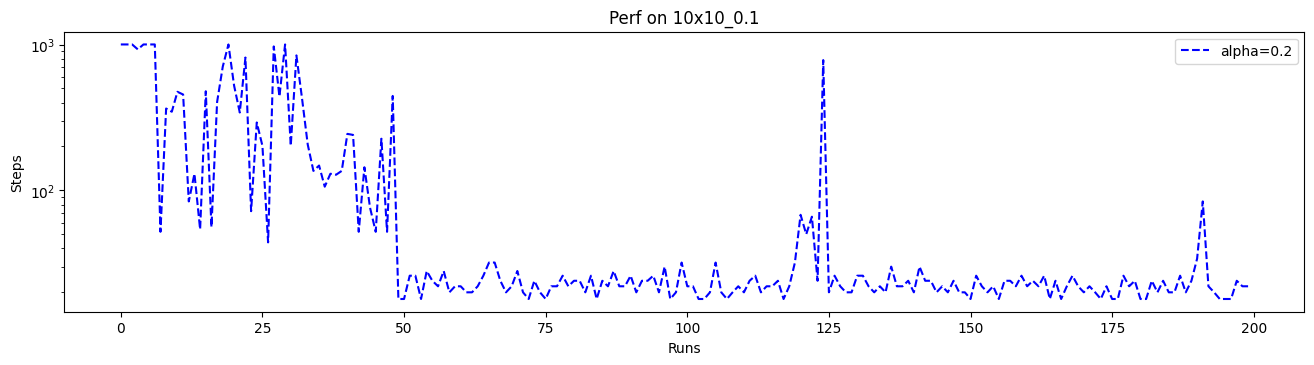

Min steps for 10x10_0.2 maze: 18


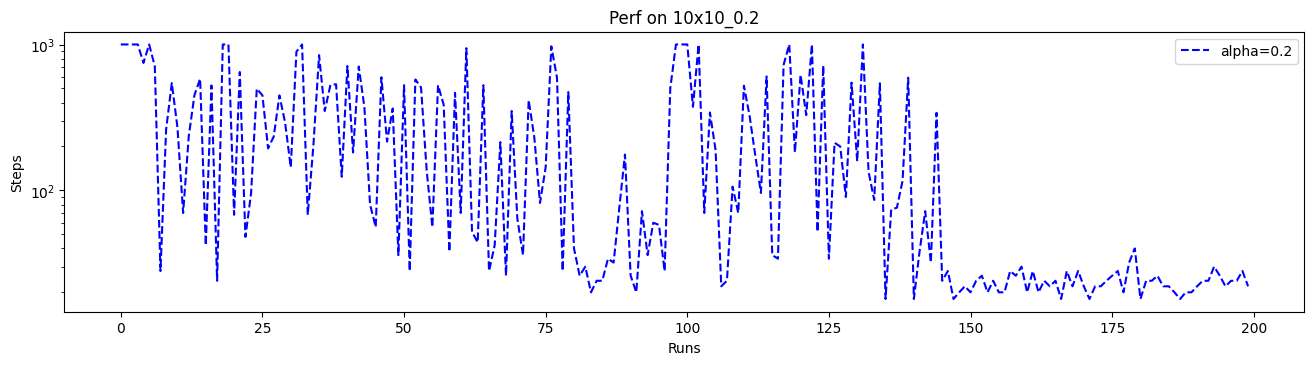

Min steps for 10x10_0.5 maze: 18


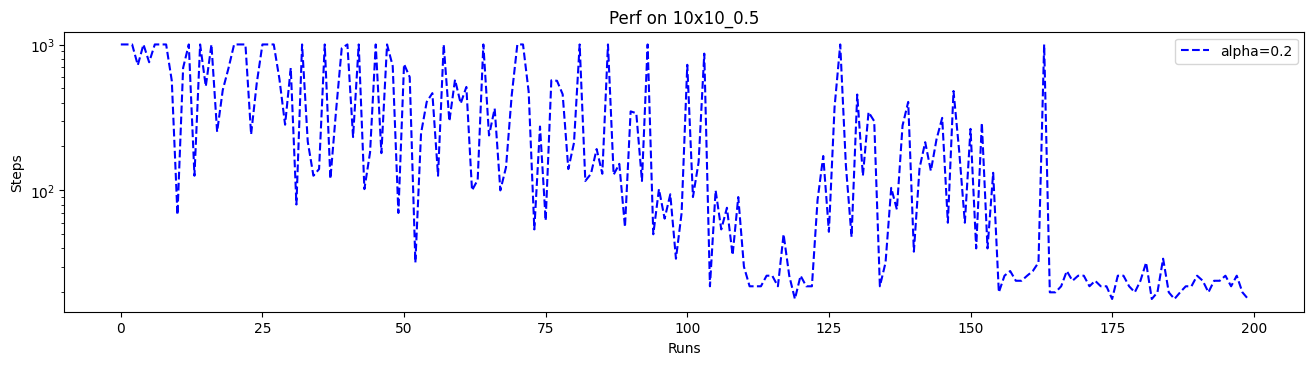

Min steps for 20x20_0.1 maze: 82


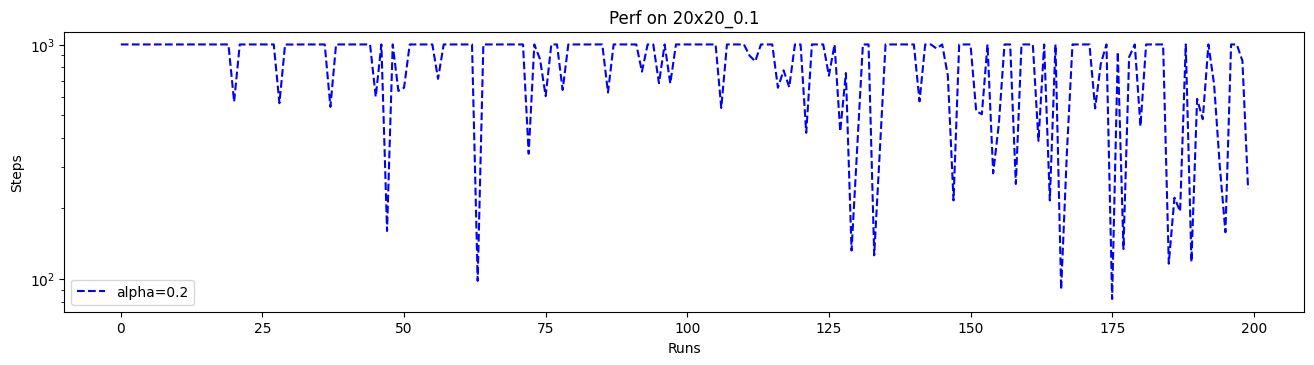

Min steps for 20x20_0.2 maze: 42


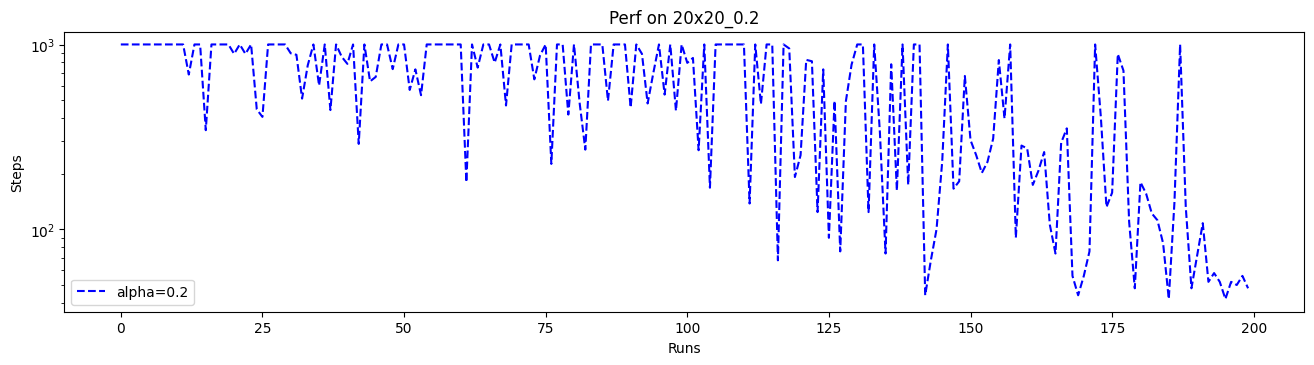

Min steps for 20x20_0.5 maze: 54


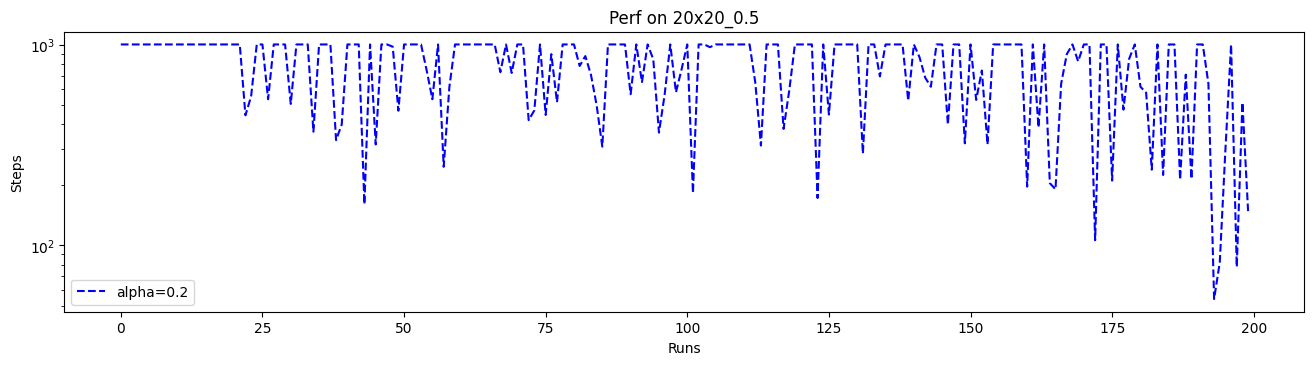

In [ ]:
# Main function for Hemläxa_01

import numpy as np
import matplotlib.pyplot as plt


def train(size, percentage, alpha=0.2, randomFactor=0.2, runs=200):

  maze = Maze_v2(size,percentage)
  robot = Agent(maze, alpha, randomFactor)

  moveHistory = []      # keep track of the number of moves.

  for i in range(runs): # number of games
      if i % 1000 == 0:
          print(i)      # just to know is running.
      while not maze.isGameOver():     # while the game is not over
          state, _ = maze.getStateAndReward()   # gets state and reward
          action = robot.chooseAction(state, maze.allowedStates[state]) # update the actions
          maze.updateMaze(action)
          # print(state)
          state, reward = maze.getStateAndReward()
          robot.updateStateHistory(state, reward)
          # print(maze.size)
          if maze.steps > 1000:                  # cut prematurely to avoid infinite looping
              maze.robotPosition = (maze.size-1, maze.size-1)
      robot.learn()                              # learns
      moveHistory.append(maze.steps)             # keep tracking of steps
      maze = Maze_v2(size, percentage)                           # resets the maze but not the agent.

  return min(moveHistory), moveHistory

results = {}
MHistories = {}

for size, percentages in [(10, [0.1, 0.2, 0.5]),(20, [0.1, 0.2, 0.5])]:
  for percentage in percentages:
    key = f"{size}x{size}_{percentage}"
    results[key], MHistories[key] = train(size, percentage)

for key in results.keys():
  print(f"Min steps for {key} maze: {results[key]}")
  plt.figure(figsize=(16,8))
  plt.subplot(211)
  plt.semilogy(MHistories[key], 'b--')
  plt.title(f"Perf on {key}")
  plt.xlabel("Runs")
  plt.ylabel("Steps")
  plt.legend([f"alpha=0.2"])

  plt.show()

# Scroll all the way down here, Takes quite a while to run 200 runs and might have accidentally left in the state check during testing


In [ ]:
from functools import total_ordering
# Alpha values:
alphas = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
randomFactors = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

bestA = None
bestRandom = None
bestAvgSteps = float('inf')


mazeTemplate = Maze_v2(10, 0.2)
leastSteps = float('inf')
bestLeastSteps = float('inf')

for alpha in alphas:
  for randomFactor in randomFactors:
    totalSteps = 0

    for _ in  range(200):
      maze = Maze_v2(10, 0.2)
      maze.maze = mazeTemplate.copy()
      robot = Agent(maze, alpha, randomFactor)

      while not maze.isGameOver():
        state, _ = maze.getStateAndReward()
        action = robot.chooseAction(state, maze.allowedStates[state])
        maze.updateMaze(action)
        state, reward = maze.getStateAndReward()
        robot.updateStateHistory(state, reward)

        if maze.steps > 800:
          break

      totalSteps += maze.steps
      if maze.steps < leastSteps:
        leastSteps = maze.steps

    avgSteps = totalSteps / 200

    if avgSteps < bestAvgSteps:
      bestAlpha = alpha
      bestRandomFactor = randomFactor
      bestAvgSteps = avgSteps
      bestLeastSteps = leastSteps

print(f"Best Alpha: {bestAlpha}")
print(f"Best randomFactor: {bestRandomFactor}")
print(f"Best Avg: {bestAvgSteps}")
print(f"Best Steps: {bestLeastSteps}")


Best Alpha: 1
Best randomFactor: 0.5
Best Avg: 558.9
Best Steps: 30
